https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset/data

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("spam.csv", encoding="latin-1")[["v1", "v2"]]

In [3]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.columns = ["label", "text"]

In [6]:
df['label'] = LabelEncoder().fit_transform(df['label'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2)

In [8]:
max_words = 5000
max_len = 100

In [9]:
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

In [10]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [11]:
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

In [12]:
model = Sequential([
    Embedding(input_dim=max_words, output_dim=64, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')])

c:\Users\Sina's Pc\Desktop\SMS Spam Collection\env\lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
history = model.fit(X_train_pad, y_train,epochs=10,batch_size=64,validation_split=0.2)

Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.8881 - loss: 0.3138 - val_accuracy: 0.9641 - val_loss: 0.1318
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.9837 - loss: 0.0685 - val_accuracy: 0.9843 - val_loss: 0.0560
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9910 - loss: 0.0291 - val_accuracy: 0.9843 - val_loss: 0.0563
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9966 - loss: 0.0132 - val_accuracy: 0.9854 - val_loss: 0.0609
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.9983 - loss: 0.0069 - val_accuracy: 0.9821 - val_loss: 0.0767
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9992 - loss: 0.0046 - val_accuracy: 0.9821 - val_loss: 0.0985
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9992 - loss: 0.0031 - val_accuracy: 0.9910 - val_loss: 0.0585
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.9994 - loss: 0.0015 - val_accuracy: 0.9843 - v

In [15]:
loss, acc = model.evaluate(X_test_pad, y_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9857 - loss: 0.0962


In [16]:
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       956
           1       0.99      0.91      0.95       159

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



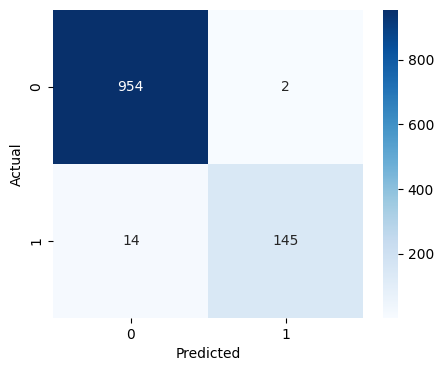

In [17]:
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(5,4))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Real Test

In [18]:
messages = [
    "Congratulations! You won a free ticket to Bahamas. Call now!",
    "Hey, are we still meeting for lunch today?",
    "URGENT! Your account has been compromised. Reply immediately!",
    "Don't forget to bring the book tomorrow."
]

In [21]:
for msg in messages:

    seq = tokenizer.texts_to_sequences([msg])

    padded = pad_sequences(seq, maxlen=max_len, padding='post', truncating='post')

    pred_prob = model.predict(padded)[0][0]

    label = "spam" if pred_prob > 0.5 else "ham"

    print("Message:", msg)
    print("Prediction:", label, f"({pred_prob:.4f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Message: Congratulations! You won a free ticket to Bahamas. Call now!
Prediction: spam (0.9996)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Message: Hey, are we still meeting for lunch today?
Prediction: ham (0.0000)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Message: URGENT! Your account has been compromised. Reply immediately!
Prediction: spam (0.9988)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Message: Don't forget to bring the book tomorrow.
Prediction: ham (0.0001)
